In [1]:
import io
import cv2 as cv
import numpy as np
import random
import pandas as pd
import os
from google.colab import drive
from google.colab import files
import tensorflow as tf
import keras.utils as ku
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive/')
#giving path
dataset_train = ("/content/drive/MyDrive/dogs-vs-cat-small/train")
dataset_validate = ("/content/drive/MyDrive/dogs-vs-cat-small/validation")
dataset_test = ("/content/drive/MyDrive/dogs-vs-cat-small/test")

Mounted at /content/drive/


In [3]:
#Reading Input Images
#Categroized images
CATEGORIES=["cats","dogs"]

train_data=[]
for category in CATEGORIES:   #category  = dogs
    
        #each cateogry into unique integer
        label=CATEGORIES.index(category) #cats label = 0 and #dogs label = 1
        path=os.path.join(dataset_train ,category)

        
        for img_file in os.listdir(path):  #img_file = "cat.999.jpg"
            img=cv.imread(os.path.join(path,img_file),1)
            imag=cv.resize(img,(150,150))            
            train_data.append((imag,label))

#shuffle the dataset fo good result
random.shuffle(train_data)

#lets seprate the image and target variable
train_X=[]
train_y=[]

for image,label in train_data:
    train_X.append(image)
    train_y.append(label)

train_X= np.array(train_X).reshape(-1,150,150,3).astype('float32') / 255.0



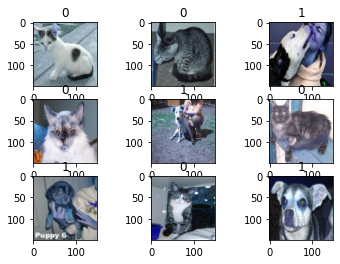

In [5]:
#lets see our data   
for i in range(9):

    plt.figure(1)
    plt.subplot(3,3,i+1)
    plt.imshow(train_X[i])
    plt.title(train_y[i])
          
plt.show()

In [6]:
#Reading validation Input Images
#Categroized images
CATEGORIES=["cats","dogs"]

val_data=[]
for category in CATEGORIES:
    
        #each cateogry into unique integer
        label=CATEGORIES.index(category) #cats label = 0 and #dogs label = 1
        path=os.path.join(dataset_validate,category)
        
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            imag=cv.resize(img,(150,150))            
            val_data.append((imag,label))

#shuffle the dataset fo good result
random.shuffle(val_data)

#lets seprate the image and target variable
val_X=[]
val_y=[]

for image,label in val_data:
    val_X.append(image)
    val_y.append(label)

val_X= np.array(val_X).reshape(-1,150,150,3).astype('float32') / 255.0


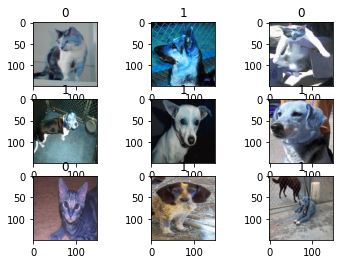

In [7]:
#lets see our data   
for i in range(9):

    plt.figure(2)
    plt.subplot(3,3,i+1)
    plt.imshow(val_X[i])
    plt.title(val_y[i])
          
plt.show()

In [8]:
#Reading test Input Images
#Categroized images
CATEGORIES=["cats","dogs"]

test_data=[]
for category in CATEGORIES:
    
        #each cateogry into unique integer
        label=CATEGORIES.index(category) #cats label = 0 and #dogs label = 1
        path=os.path.join(dataset_test,category)
        
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            imag=cv.resize(img,(150,150))            
            test_data.append((imag,label))

#shuffle the dataset fo good result
random.shuffle(test_data)

#lets seprate the image and target variable
test_X=[]
test_y=[]

for image,label in test_data:
    test_X.append(image)
    test_y.append(label)

test_X= np.array(test_X).reshape(-1,150,150,3).astype('float32') / 255.0

In [9]:
#converting labels to array
train_y = np.array(train_y)
val_y = np.array(val_y)
test_y = np.array(test_y)

In [21]:
#create your model as told in lab 
!pip install tensorflow
import tensorflow as tf
!pip install keras
from tensorflow import keras
from tensorflow.keras import layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
#MODEL:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
model = keras.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [28]:
#compile your model
model.compile(loss=['binary_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])

In [29]:
history = model.fit(train_X, train_y, epochs=30, batch_size=15, validation_data=(val_X, val_y))

Epoch 1/30
14/14 [==============================] - 8s 52ms/step - loss: 0.7471 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/30
14/14 [==============================] - 0s 21ms/step - loss: 0.6933 - accuracy: 0.5198 - val_loss: 0.6924 - val_accuracy: 0.5167
Epoch 3/30
14/14 [==============================] - 0s 18ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6918 - val_accuracy: 0.6333
Epoch 4/30
14/14 [==============================] - 0s 18ms/step - loss: 0.6906 - accuracy: 0.5545 - val_loss: 0.6857 - val_accuracy: 0.6000
Epoch 5/30
14/14 [==============================] - 0s 18ms/step - loss: 0.6786 - accuracy: 0.5990 - val_loss: 0.7039 - val_accuracy: 0.5000
Epoch 6/30
14/14 [==============================] - 0s 21ms/step - loss: 0.7016 - accuracy: 0.5347 - val_loss: 0.6937 - val_accuracy: 0.5167
Epoch 7/30
14/14 [==============================] - 0s 21ms/step - loss: 0.6894 - accuracy: 0.5297 - val_loss: 0.6931 - val_accuracy: 0.5167
Epoch 8/30
14

In [31]:
model.evaluate(test_X, test_y)

1/1 [==============================] - 0s 311ms/step - loss: 1.8023 - accuracy: 0.6875


[1.8022574186325073, 0.6875]